In [32]:
import librosa
import librosa.display
import numpy as np
import pandas as pd

import os
import sys
import glob
import numpy as np
import librosa
from scipy.io import wavfile

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

In [33]:
df = pd.read_csv('emotion_final_dataframe.csv')

In [34]:
df.shape

(1440, 42)

In [35]:
df = pd.DataFrame(data=df)

In [36]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,emotion
0,0,-411.42325,28.631102,-19.307844,-0.252194,-9.265969,-12.007793,-12.258695,-12.255995,-21.373018,...,2.734829,-3.752675,1.145827,-2.514876,1.765553,0.858907,0.361832,-3.443622,0.664355,angry
1,1,-567.58154,58.059013,-0.367178,11.210473,-7.266612,-5.761852,-15.832197,-13.208914,-8.705344,...,1.660597,-0.229978,2.424004,1.756849,4.674251,4.580213,4.904161,1.212360,2.526178,disgust
2,2,-517.54395,58.637646,-10.348402,8.709674,2.052573,-4.895917,-13.776676,-18.894566,-8.229303,...,1.853005,1.151743,4.308281,0.120215,2.618298,-2.491526,1.850155,-1.525908,0.273403,fear
3,3,-536.45123,74.282646,-6.555147,20.807089,7.564309,-6.143597,-1.904534,-5.278207,-14.727818,...,-0.655519,-2.748801,-1.261348,-4.054331,0.426546,-1.644613,-2.679656,-3.054965,-0.183676,fear
4,4,-627.58545,82.721640,-2.941343,19.169683,9.158229,-1.076147,2.526776,2.448751,-5.019006,...,0.707601,-0.363481,1.152451,-1.475377,1.344601,-1.251780,1.282548,-1.846820,-0.340204,neutral


In [37]:
df.set_index('Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,-411.42325,28.631102,-19.307844,-0.252194,-9.265969,-12.007793,-12.258695,-12.255995,-21.373018,-1.261482,...,2.734829,-3.752675,1.145827,-2.514876,1.765553,0.858907,0.361832,-3.443622,0.664355,angry
1,-567.58154,58.059013,-0.367178,11.210473,-7.266612,-5.761852,-15.832197,-13.208914,-8.705344,4.412875,...,1.660597,-0.229978,2.424004,1.756849,4.674251,4.580213,4.904161,1.212360,2.526178,disgust
2,-517.54395,58.637646,-10.348402,8.709674,2.052573,-4.895917,-13.776676,-18.894566,-8.229303,5.272612,...,1.853005,1.151743,4.308281,0.120215,2.618298,-2.491526,1.850155,-1.525908,0.273403,fear
3,-536.45123,74.282646,-6.555147,20.807089,7.564309,-6.143597,-1.904534,-5.278207,-14.727818,1.899420,...,-0.655519,-2.748801,-1.261348,-4.054331,0.426546,-1.644613,-2.679656,-3.054965,-0.183676,fear
4,-627.58545,82.721640,-2.941343,19.169683,9.158229,-1.076147,2.526776,2.448751,-5.019006,0.630730,...,0.707601,-0.363481,1.152451,-1.475377,1.344601,-1.251780,1.282548,-1.846820,-0.340204,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-515.05273,36.625600,-23.459131,-0.734843,-19.144012,-17.449547,-16.576954,-11.636462,-10.368714,1.625537,...,2.180326,-2.034385,0.693187,-1.768760,1.693141,-1.850951,0.113825,-1.515068,0.379858,surprised
1436,-443.14290,42.202713,-21.192501,-0.396508,-6.677405,-7.272346,-17.943007,-8.275774,-11.575447,-7.229387,...,5.077045,1.951673,5.401894,2.464976,2.844375,1.239990,1.897454,0.804007,3.373390,fear
1437,-548.51510,53.843044,-8.388637,-4.441487,-5.899427,-4.521986,-9.979323,-13.927219,-14.893645,-1.046266,...,4.814416,0.600139,2.317402,0.391136,3.286439,1.094747,2.423396,-0.725055,2.336626,disgust


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

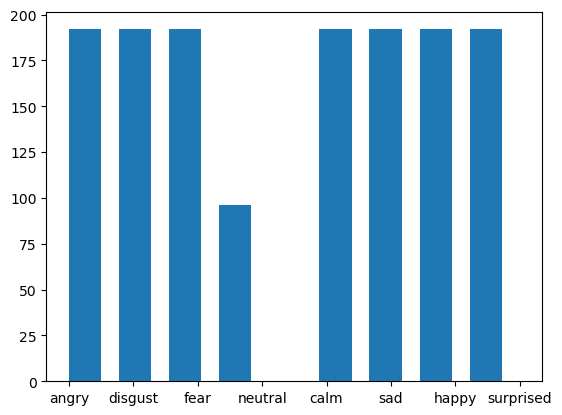

In [38]:
plt.figure()
plt.hist(df['emotion'], bins=9, width=0.5)
plt.figure

## Graph audio files

In [39]:
sample_file = "RawData/03-01-01-01-01-01-03.wav"

In [40]:
#sample 
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_feat = 13
n_mfcc = 40 #number of MFCCs to return => number of features
n_fft = 552
window = 0.4
test_shift = 0.1
duration = 2.5
axis_mfcc = 1 #axis =0 means along the columns and axis =1 along the row

In [41]:
# X = audio time series
# sample_rate = sampling rate of X


X, sample_rate = librosa.load(sample_file, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s,
                                 mono=False)

print(X)
print(sample_rate)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.7317375e-05
 -5.8841056e-06  0.0000000e+00]
22050


In [42]:
time = np.arange(0,len(X))/sample_rate
print(time) # prints timeline

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.93664399e+00
 2.93668934e+00 2.93673469e+00]


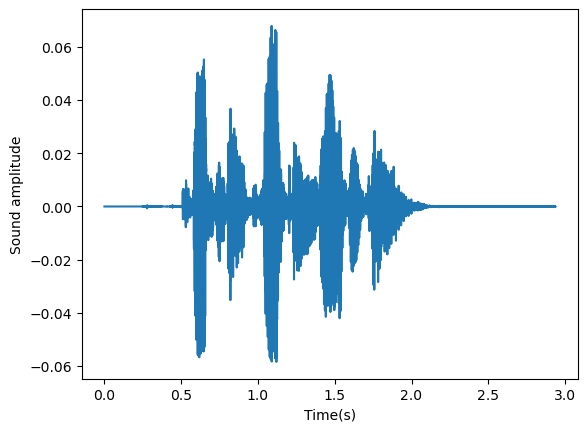

In [43]:
fig, ax = plt.subplots()
ax.plot(time,X)
ax.set(xlabel='Time(s)',ylabel='Sound amplitude')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


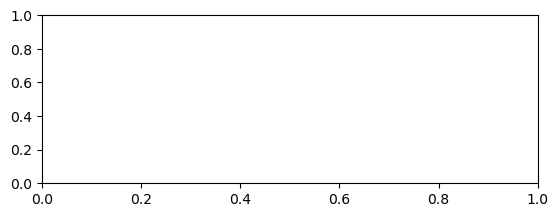

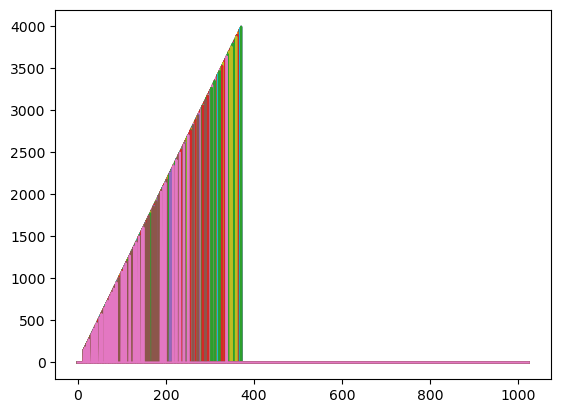

In [44]:
pitches, magnitudes = librosa.piptrack(y=X, sr=sample_rate)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

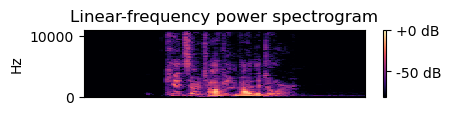

In [45]:
y, sr = librosa.load(sample_file)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [46]:
librosa_audio, librosa_sample_rate = librosa.load(sample_file)

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 149)


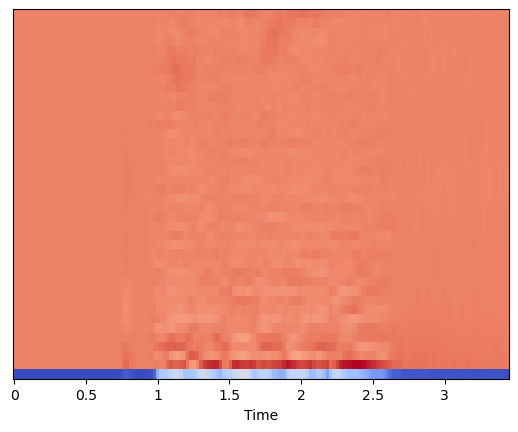

In [47]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')




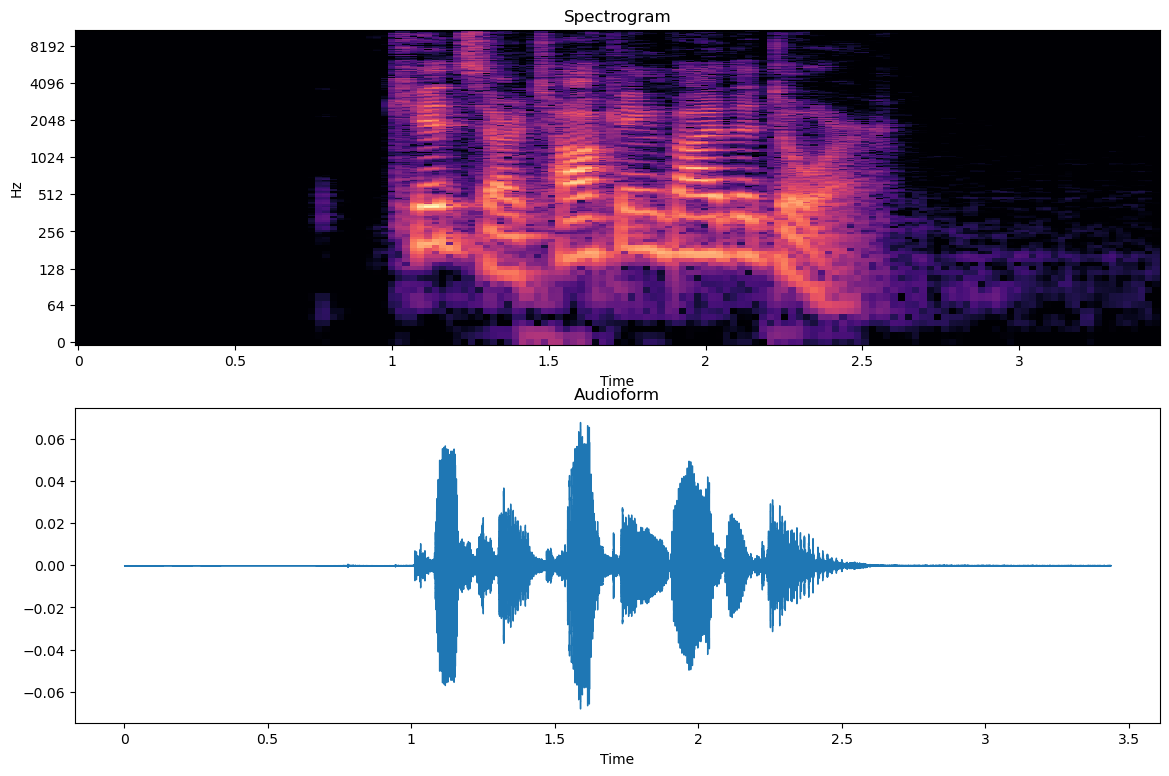

In [48]:
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(14, 9))

plt.figure(1)

plt.subplot(211)
plt.title('Spectrogram')
librosa.display.specshow(stft_db, x_axis='time', y_axis='log')

plt.subplot(212)
plt.title('Audioform')
librosa.display.waveshow(y, sr=sr)

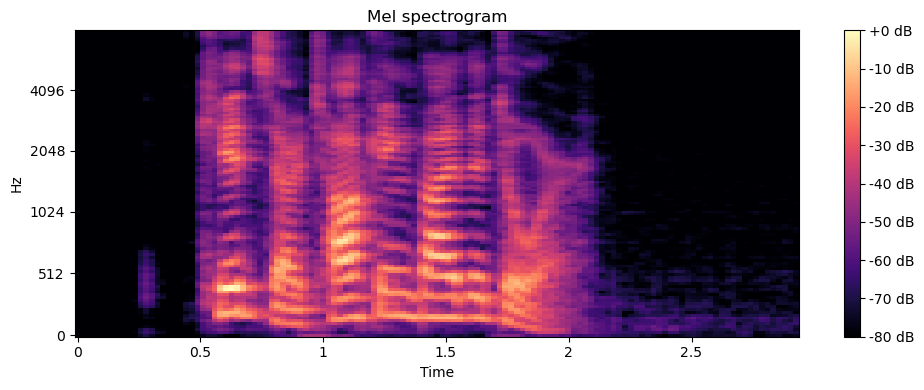

In [49]:
librosa.feature.melspectrogram(y=X, sr=sample_rate)

D = np.abs(librosa.stft(X))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

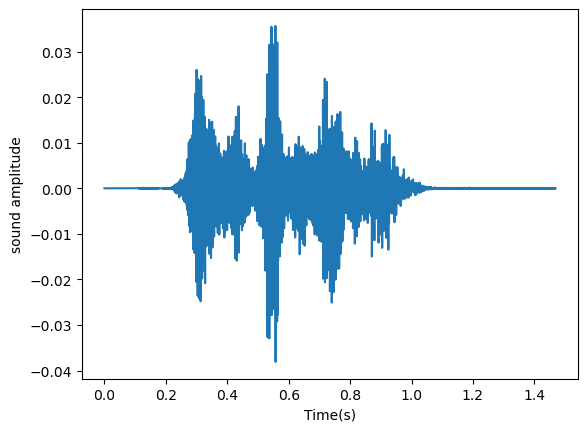

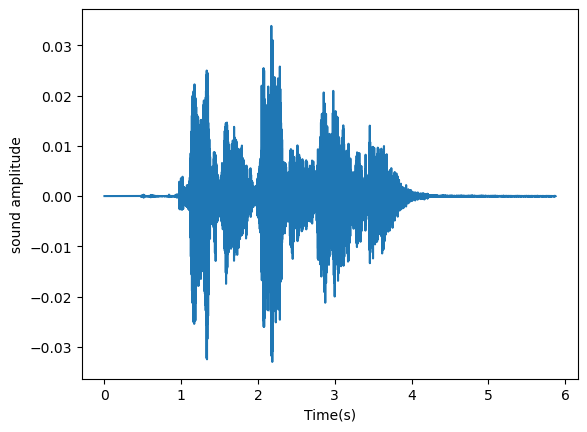

In [50]:
y_fast = librosa.effects.time_stretch(X, rate=2.0)
time = np.arange(0,len(y_fast))/sample_rate
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#compress to be twice as fast

y_slow = librosa.effects.time_stretch(X, rate=0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#half the original speed

In [51]:
S = np.abs(librosa.stft(X))
S

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0231046e-04,
        1.3089445e-03, 5.4288533e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1432891e-03,
        1.0289731e-03, 5.5298046e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5367977e-03,
        9.3246548e-04, 1.3685728e-03],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.4221357e-09,
        1.0157275e-06, 5.6887343e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0173581e-09,
        1.0165983e-06, 5.6911822e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7309482e-09,
        1.0077099e-06, 5.6854979e-06]], dtype=float32)

In [52]:
#lms = librosa.power_to_db(S)
#lms

log_S = librosa.amplitude_to_db(S, ref=np.max)

In [53]:
from librosa.core import istft
vocals = istft(log_S)

In [54]:
mfccs_test = librosa.feature.mfcc(y=vocals, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
mfccs_test

array([[-830.59106  , -830.59106  , -830.59106  , ..., -608.67847  ,
        -591.89185  , -577.436    ],
       [   0.       ,    0.       ,    0.       , ...,  250.98416  ,
         245.47842  ,  219.77203  ],
       [   0.       ,    0.       ,    0.       , ...,  115.21374  ,
          83.64006  ,   50.86176  ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,   -1.2494992,
          -1.5959809,   -3.5295455],
       [   0.       ,    0.       ,    0.       , ...,   20.27102  ,
           8.862451 ,    1.5295206],
       [   0.       ,    0.       ,    0.       , ...,   12.937549 ,
           1.7884176,   -3.1905174]], dtype=float32)

In [55]:
mfccs_final = np.mean(mfccs_test,axis = axis_mfcc)
mfccs_final

array([-3.1680997e+02,  9.4759209e+01,  1.4954989e+01,  1.6840263e+01,
       -2.5653162e+00,  3.8933234e+00, -1.0377252e+01,  3.8739638e+00,
       -1.5211227e+00,  3.8660147e+00, -9.2136545e+00,  7.9178643e+00,
       -2.2793984e+00,  6.0906539e+00, -8.3024359e+00,  5.0754743e+00,
       -3.2885356e+00,  3.6801853e+00, -4.1336842e+00,  1.6349915e+00,
       -3.2903061e+00,  5.0394845e+00, -5.9877224e+00,  4.5969419e+00,
       -6.1113591e+00,  5.2507510e+00, -3.1076947e-01,  5.1328449e+00,
       -4.9158688e+00,  3.9910250e+00, -2.0115175e+00,  5.0854254e+00,
       -2.9089499e+00,  1.9747016e+00, -5.7216749e+00,  1.6716547e+00,
       -1.7531534e+00,  3.3785663e+00, -3.9458053e+00,  4.0946418e-01],
      dtype=float32)

In [56]:
S = np.abs(librosa.stft(X))
lms = librosa.power_to_db(S**2)
    #lms = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=X,sr=sample_rate))
mfccs = np.mean(librosa.feature.mfcc(   y=lms, 
                                            sr = mfcc_sample_rate, 
                                            n_mfcc = n_mfcc), 
                                            axis = axis_mfcc) #Can

c:\Users\neilc\.conda\envs\dev1\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=127
  warnings.warn(


In [57]:
sample_rate = np.array(sample_rate)
sample_rate

array(22050)

In [58]:
print(f"n_mfcc = {n_mfcc}")
print(f"sr = {mfcc_sample_rate}")

z = librosa.feature.mfcc(y=X, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
for x in z:
    print(x)

n_mfcc = 40
sr = 22050
[-770.29987 -770.29987 -770.29987 -770.29987 -770.29987 -770.29987
 -770.29987 -770.29987 -770.29987 -770.29987 -770.1479  -746.96735
 -732.02264 -744.13184 -762.309   -768.7486  -770.29987 -770.29987
 -770.2877  -762.5198  -763.60297 -604.3677  -474.6797  -444.1146
 -449.31616 -402.03745 -371.48965 -362.62463 -370.26514 -428.18384
 -481.6072  -463.56775 -459.58517 -439.35837 -372.64368 -345.25058
 -355.1373  -397.1944  -419.5083  -448.13605 -513.76733 -469.2534
 -425.40024 -412.67288 -396.35422 -354.4637  -337.72638 -328.1071
 -323.54916 -361.7391  -433.1303  -442.52664 -410.70438 -400.00266
 -407.02612 -431.50845 -472.5894  -503.53693 -516.8141  -547.99023
 -466.1653  -397.2219  -376.02017 -378.76477 -373.1167  -376.7308
 -401.9057  -458.83228 -507.03342 -461.28583 -436.57028 -456.5284
 -529.4442  -519.4545  -425.52325 -379.46085 -391.05438 -428.9151
 -468.5651  -486.9811  -485.7937  -479.8426  -492.78125 -513.32007
 -535.28015 -562.33453 -586.06116 -596.8779  

In [59]:
mfccs = np.mean(z, axis=1)
mfccs

array([-5.8638342e+02,  6.7529655e+01, -4.9390116e+00,  1.3853410e+01,
        3.3756034e+00, -1.3424913e+00, -1.5607982e+01, -6.3601794e+00,
       -5.1046791e+00, -8.5729437e+00, -3.7283986e+00, -1.7711827e+00,
       -7.1652761e+00,  3.0074105e-01, -8.2956047e+00, -7.4293375e-01,
       -6.5919299e+00, -2.3059585e+00, -3.3074229e+00, -4.7451782e+00,
       -5.7555037e+00, -4.5017409e+00, -5.3757458e+00, -2.7337501e+00,
       -5.6170988e+00, -5.2819721e-02, -3.6261609e+00, -1.3181318e+00,
       -3.5162840e+00, -1.2569782e+00, -2.0916362e+00, -1.5496519e+00,
       -1.8920161e+00,  1.1643379e+00, -5.5426344e-02, -1.2534595e+00,
       -3.2256355e+00, -2.3611395e+00, -1.3182024e+00,  2.9594476e+00],
      dtype=float32)

(0.0, 1.0, 40.0, 0.0)

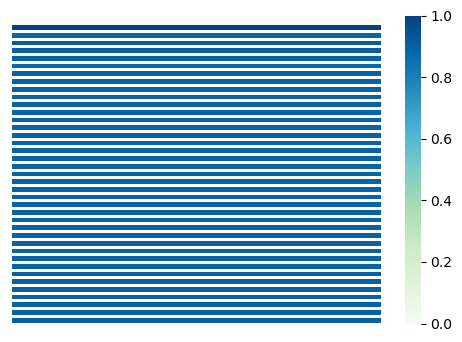

In [60]:
import seaborn as sns
# Put this into a heatmap
_min = np.amin(mfccs)
_max = np.amax(mfccs)
mfcc = (mfccs - _min) / (_max - _min)


plt.figure(figsize = (6,4))
sns.heatmap(mfcc[:, np.newaxis], cmap = 'GnBu', linewidth = 1)
plt.axis('off')

In [61]:
y,sr = librosa.load(sample_file)
print(librosa.get_duration(filename=sample_file))
print(librosa.get_duration(y=y,sr=sr))

3.4367708333333336
3.436780045351474


C:\Users\neilc\AppData\Local\Temp\ipykernel_23644\728644220.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  print(librosa.get_duration(filename=sample_file))
